# Lab-05: Data Science with Natural Language

In this lab, you will learn and gain hands-on experience on the use of natural language processing for data science analysis.

Follow the instruction and run the code cells. Make sure you understand what happens in every stage. <br>

<b>Helpful Links:</b>

  https://www.nltk.org/

Some components of this lab are adapted from: https://realpython.com/nltk-nlp-python/



## Install packages

In [65]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("punkt")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.tag import pos_tag
from nltk.data import find
from nltk.tokenize import word_tokenize

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-65-ccedc46af458>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [66]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

# Sentiment Analysis using Vader - Simple Examples

Here we have 6 example sentence and we use Vader to score the sentiment of them. Vader is a rule-based model for analysing the setiment of text.

The documentation and assoicated paper citation is here: https://www.nltk.org/api/nltk.sentiment.vader.html

In [67]:
#Example sentences
sentences = ["VADER is smart, handsome, and funny.",
            "Professor Scott is a great professor with excellent teaching skills and research ability",
            "Eldan is a good programmer, he is very good at python and Java",
            "John is a good programmer, he is good at Java and C++ but not doing that well in python",
            "MIEXXX is such a boring course, the projects are too long to finish",
            "MIE223 is a very interesting course which is taught by a great professor and has very useful knowledge"]


In [68]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    # Instantiate an instance to access SentimentIntensityAnalyzer class
    # from vader in nltk
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print("\n" + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [69]:
evalSentences(sentences)

100%|██████████| 6/6 [00:00<00:00, 1142.76it/s]


VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 

Professor Scott is a great professor with excellent teaching skills and research ability
compound: 0.8779, neg: 0.0, neu: 0.471, pos: 0.529, 

Eldan is a good programmer, he is very good at python and Java
compound: 0.7003, neg: 0.0, neu: 0.633, pos: 0.367, 

John is a good programmer, he is good at Java and C++ but not doing that well in python
compound: 0.1727, neg: 0.105, neu: 0.71, pos: 0.185, 

MIEXXX is such a boring course, the projects are too long to finish
compound: -0.3182, neg: 0.173, neu: 0.827, pos: 0.0, 

MIE223 is a very interesting course which is taught by a great professor and has very useful knowledge
compound: 0.883, neg: 0.0, neu: 0.558, pos: 0.442, 


# Working with real review data

We will use a small sample of hotel reviews from San Jose, California that has been precompiled from TripAdvisor.

In [70]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/sj-mx50.csv',
                          header=None,
                          names=columnNames)

In [71]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data_sj_50/ca/33020/81679/882698003.html,The Westin San Jose,"""Visited this location as part of a conference. Got there and I have to say, I am sorry I didn\u2019t book the Marriott across the street. This place is old, only thing I can say is the bathroom was nice. It took 2 hours to get a receipt from the hotel and check out because they could figure out how to get the receipt. This is also a Marriott and when I complained, I got a note from the offending manager. Marriott member for years; i;Ve decided I am going over to the Hilton now. Horrible exp...",1,negative,"March 19, 2023",302 S Market St,"('San Jose',)",California,95113-2817
1,data_sj_50/ca/33020/81679/903575196.html,The Westin San Jose,"""Absolutally Stunning hotel. I booked with the Westin for an event, my event coordinators, Juan Carlos Lopez and Maika, were so amazing. Very helpful, attentive. They are so knowledgeable and assisted me and my guests with anything we needed. 10\u002F10 would recommend. In addition to the amazing staff, the hotel is just gorgeous. The rooms are so amazing! Very large and spacious. After the event we definelty had time to relax.",5,positive,"July 16, 2023",302 S Market St,"('San Jose',)",California,95113-2817
2,data_sj_50/ca/33020/81679/915869850.html,The Westin San Jose,"""This used to be my preferred lodging option in San Jose. Only for that reason did I give it two instead of one stars. The mattresses are cozy and the rooms are lovely. Excellent customer service used to be offered at every desk. I'm a lifetime Elite member with Marriott, and according to availability, I should get a free upgrade when I check in. They haven't upgraded me or even mentioned it the last few times I've checked in. The previous time I went there, I requested an upgrade and was to...",2,negative,"September 10, 2023",302 S Market St,"('San Jose',)",California,95113-2817
3,data_sj_50/ca/33020/81679/874909653.html,The Westin San Jose,"""Ideally I would gove 4.5 there was a small misunderstanding about parking. We thought the price per day is per 24h but it became calendar day and we payed about $50 for one night parking. The Vallet parking is cheaper option but we learned it after the fact.\n\nHowever, I had the best sleep ever. The hotel was quite, mattress was great and I slept like a baby. This deserve 5 star for sure.",5,positive,"January 12, 2023",302 S Market St,"('San Jose',)",California,95113-2817
4,data_sj_50/ca/33020/81679/919136495.html,The Westin San Jose,"""1. It's a really bad location of the room and ruined my trip without a good sleep for 3 nights. I arrived on Monday 3:30pm. I was given a room on the second floor without upgrade. I was told it's full. I only found out the the room is right behind the elevator at night with constant noise. The conference started on Tuesday. People usually arrived at Monday night. Check in starts at 3pm. At 3:30, that's only room available?\n2. The valet parking guy lied to me and said the price is $40. Dou...",1,negative,"September 30, 2023",302 S Market St,"('San Jose',)",California,95113-2817


## Sentiment Analysis

 The raw reivews can be fed directly into Vader. Alternatively some data cleaning could be conducted before this step. As you can see the Vader scores line up well with the ratings.

In [72]:
reviews = hotelDf['reviewColumn'].values

In [73]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDF = pd.concat([reviewDF, hotelDf[['ratingScore']]], axis=1)

100%|██████████| 233/233 [00:00<00:00, 783.00it/s]


In [74]:
reviewDF.head()

,reviewCol,vader,ratingScore
0,"""Visited this location as part of a conference. Got there and I have to say, I am sorry I didn\u2019t book the Marriott across the street. This place is old, only thing I can say is the bathroom was nice. It took 2 hours to get a receipt from the hotel and check out because they could figure out how to get the receipt. This is also a Marriott and when I complained, I got a note from the offending manager. Marriott member for years; i;Ve decided I am going over to the Hilton now. Horrible exp...",-0.6705,1
1,"""Absolutally Stunning hotel. I booked with the Westin for an event, my event coordinators, Juan Carlos Lopez and Maika, were so amazing. Very helpful, attentive. They are so knowledgeable and assisted me and my guests with anything we needed. 10\u002F10 would recommend. In addition to the amazing staff, the hotel is just gorgeous. The rooms are so amazing! Very large and spacious. After the event we definelty had time to relax.",0.9852,5
2,"""This used to be my preferred lodging option in San Jose. Only for that reason did I give it two instead of one stars. The mattresses are cozy and the rooms are lovely. Excellent customer service used to be offered at every desk. I'm a lifetime Elite member with Marriott, and according to availability, I should get a free upgrade when I check in. They haven't upgraded me or even mentioned it the last few times I've checked in. The previous time I went there, I requested an upgrade and was to...",-0.2249,2
3,"""Ideally I would gove 4.5 there was a small misunderstanding about parking. We thought the price per day is per 24h but it became calendar day and we payed about $50 for one night parking. The Vallet parking is cheaper option but we learned it after the fact.\n\nHowever, I had the best sleep ever. The hotel was quite, mattress was great and I slept like a baby. This deserve 5 star for sure.",0.9640,5
4,"""1. It's a really bad location of the room and ruined my trip without a good sleep for 3 nights. I arrived on Monday 3:30pm. I was given a room on the second floor without upgrade. I was told it's full. I only found out the the room is right behind the elevator at night with constant noise. The conference started on Tuesday. People usually arrived at Monday night. Check in starts at 3pm. At 3:30, that's only room available?\n2. The valet parking guy lied to me and said the price is $40. Dou...",-0.7915,1


In [75]:
# top 5 reviews
reviewDF.sort_values(by='vader', ascending=False).head(5)

,reviewCol,vader,ratingScore
124,"""Drastic transformations led to us forfeiting our own place in order to take care of family. Although it is something we'd not trade in for the world- it is extremely overwhelming...It definitely requires a break that is ABSOLUTELY necessary.. That said, we've made it a point to go to a hotel when we can to have peace of mind, and to take care of tasks we must in order to regain normalcy in our own lives. That said, we normally stay at a place in Los Gatos or Campbell- However in our search ...",0.9976,5
36,"""With all the traveling that my husband and I do, it is nice to walk into a hotel that makes you feel welcomed. It gets real old fast, but the front desk staff is excellent at the Residence Inn South San Jose. You have Mario that welcomes you with a smile and interacts with great conversations. We know most of the Front Staff and they too, are excellent. Alexis, Janell, Sebonay (sorry, if I misspelled your name) and Orlando are just wonderful to engage with. The rooms are clean and the h...",0.9961,5
129,"""I don\u2019t gush about motels, but I will for this one! Giant Room that was very clean with a comfortable bed with high quality sheets, big TV, microwave, safe. Small fridge, ironing board, iron, hair dryer, big desk, TWO phones, comfy easy chair, plenty of lighting, soap, shampoo, conditioner, lotion. Plenty of towels. The breakfast that is included with the room wasn\u2019t just a roll and coffee. Your choice of Scrambled eggs, sausage patties, 4 different cereals, Bagels, muffins, toa...",0.9960,5
6,"""What a fabulous stay we had at this hotel! Very well situated in the middle of Santana Row (so easy access to great food, shopping & a cinema). The premises & the room itself were beautiful & spotless. The staff was welcoming & responsive. The glass of sangria we were offered upon checking in was a great start. The room was spacious enough & the bed was very comfortable, with light-as-a-feather bedding. A hotel can make or break a vacation & this hotel definitely set the stage for us to ha...",0.9921,5
105,"""The room was clean and comfortable. The highlight at this hotel is hands down Q at the lobby.bar. My husband and I were here to celebrate our 10th Anniversary - we stayed in the hotel 6 nights. It wasn\u2019t until the night before our last that we decided to go down to the bar (initially to play ping pong) and we ended up up staying until it closed. Q is friendly, personable and great at what he does. We enjoyed getting to know him and learning some things about the area. Working in the in...",0.9920,5


In [76]:
# bottom 5 reviews
reviewDF.sort_values(by='vader').head(5)

,reviewCol,vader,ratingScore
138,"""First, we arrived and were sent up to room 316 where there was a hair in the bathtub. Most every time we left the room, when we came back, our key cards didn't work. We had to get new ones daily. When we asked the dismissive employee at the front desk about this, he told us that it was likely because the people who keep giving us our room keys are too lazy to set them for the entirety of our stay, and instead only activate them for one day at a time. He assured us the keys he was giving us ...",-0.9930,1
195,"""Avoid this hotel at all costs. It is far below the level a Wyndham should be and I've reported these issues to corporate.\n\nFirst, when I checked in I was given a queen room instead of the king I'd reserved. I was so exhausted I decided I'd stay the night and switch the next day for the remaining two nights. If I could have cancelled the remaining nights, I would have but they were not refundable.\n\nThe hotel is in terrible condition. There are lots of tears in the walls and marks and scu...",-0.9827,1
91,"""I've been a valued customer with over 45 bookings,price is outrageous had to pay 102 dollars. Only good thing here is it's pet friendly.lots of people walking at odf ours of the night random people smoking glass bowl outside ,no common curtsy if there's family or children\n\nIl get to the point I stayed payed 102 dollars for my stay and there was a double murder I was forced by police to stay in my room because it was a ongoing investigation was unable to go to work could not get no meal to...",-0.9793,1
139,"""Dirty, run down, stinks of smoke. I reserved a non smoking room 326 was issued to me, it stank of smoke, not just a little but absolutely stank. When I spoke to reception they told me that the top floor had been \""remodeled\"" last week from a smoking floor to non smoking. Remodeling turns out to be changing the sign on the door. Disgusting dump. Avoid if you can.",-0.9423,1
211,"""Horrible experience here no TV was told I could pay cash when I ran to check in how do use my credit card because they would take cash one out that worked in the whole room no phone cords to the phones no TV worked my refrigerator didn\u2019t work my bathtub was dirty and the bottom was peeling up no maid service everything was horrible care to hear anything about it horrible service",-0.9413,1


## Find the words the convery the highest sentiment by Mutual Information

### First we need to do some preprocessing
1. Find Top-K words (you will need to do some preprocessing in the assignment)
2. Build a dataframe with one-hot encoding for words present in each review

In [77]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    # go through each review and feed words into counter
    for review in reviews:
            counter.update([word.lower()
                            for word
                            in word_tokenize(review)
                            if word.lower() not in stop and len(word) > 2])

    # get top k most common
    topk = counter.most_common(kwords)
    return topk

def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf


In [78]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

In [79]:
topk[:10]

[('clean', 110),
 ('one', 97),
 ("n't", 91),
 ('desk', 85),
 ('would', 80),
 ('breakfast', 75),
 ('nice', 74),
 ('great', 74),
 ('night', 73),
 ('front', 71)]

In [80]:
finaldf.head()

,hotelName,groundTruth,reviewCol,vader,ratingScore,clean,one,n't,desk,would,breakfast,nice,great,night,front,place,good,like,service,get,even,could,area,also,back,bed,comfortable,time,friendly,location,san,jose,stayed,parking,check,door,airport,never,people,two,next,work,got,morning,really,another,around,property,manager,free,...,well,close,went,made,floor,hotels,quiet,coffee,bathroom,helpful,told,staying,say,customer,checked,every,sure,day,first,food,motel,marriott,said,right,shower,pool,needed,away,come,price,best,definitely,everything,know,inn,towels,old,excellent,'ve,need,family,lot,water,little,hot,recommend,available,still,small,noise,shuttle,came,better,across,going,someone,since,experience,feel,long,new,thing,booked,pay,make,ask,car,lobby,many,street,phone,open,reservation,working,however,nights,much,easy,far,dirty,didn\u2019t,guests,called,sleep,bad,full,found,see,things,week,else,super,decided,anything,give,guest,way,asked,though,find,want,housekeeping,checking,star,lots,restaurant,thank,lady,top,use,safe,fresh,late,left,return,reason,arrived,second,walking,quick,issues,near,reviews,wifi,restaurants,always,card,extra,bar,bit,days,extended,suite,side,ever,welcoming,call,amenities,leave,slow,business,put,big,move,outside,tried,\nthe,took,horrible,times,nothing,look,looked,without,worked,think,hear,hair,walk,luggage,smell,walls,waiting,tub,trash,stained,building,closed,broken,pillows,note,member,years,amazing,used,last,needs,either,per,elevator,least,access,enough,absolutely,charge,due,freeway,rest,covid,help,key,early,enjoyed,kind,wyndham,website,moved,name,modern,it\u2019s,credit,eat,park,located,nearby,overall,gym,care,residence,south,home,cheap,wife,directly,within,problems,air,issue,sheets,spacious,suites,later,pretty,keep,quite,given,short,literally,upon,truck,almost,person,run,beds,money,gave,extremely,don\u2019t,cost,comfort,visit,looking,fast,son,wanted,management,carpet,surestay,offered,clerk,others,especially,thought,mattress,behind,toilet,clearly,options,seemed,try,might,done,store,house,level,center,worst,different,mention,several,plenty,actually,'re,highly,quality,king,able,immediately,rude,wasn\u2019t,charged,whole,complimentary,husband,kitchen,bedroom,take,something,security,\n\nthe,policy,holiday,cold,microwave,ice,huge,disgusting,worth,part,book,instead,employees,helping,walked,filthy,probably,distance,convenient,set,none,machine,fridge,travel,less,plus,job,minutes,giving,already,keys,updated,places,believe,request,longer,booking,paid,despite,i\u2019ve,renovation,rate,cleaning,informed,grocery,getting,review,ended,offer,coming,let,brand,weeks,choice,paying,point,highway,wall,bring,awesome,missing,low,i\u2019m,floors,2nd,event,large,relax,option,upgrade,cleaned,'ll,heard,attitude,downtown,number,decent,limited,city,live,making,completely,comfy,happy,please,twice,opened,fact,okay,seem,loud,cleanliness,convenience,drive,loved,month,zero,road,variety,dinner,traveling,high,problem,site,refrigerator,disappointed,fire,doors,brought,tell,obviously,min,light,smoking,chair,mold,shampoo,thin,laundry,glad,running,garage,menu,muffins,juice,bathtub,towel,bugs,hallways,sorry,hours,addition,young,may,turned,empty,understand,trip,started,guy,double,fairly,check-in,view,beautiful,break,visiting,show,negative,except,kept,stains,properties,refund,wonderful,plug,question,uncomfortable,value,safety,overnight,busy,grab,although,fee
0,The Westin San Jose,negative,"""Visited this location as part of a conference. Got there and I have to say, I am sorry I didn\u2019t book the Marriott across the street. This place is old, only thing I can say is the bathroom was nice. It took 2 hours to get a receipt from the hotel and check out because they could figure out how to get the receipt. This is also a Marriott and when I complained, I got a note from the offending manager. Marriott member for years; i;Ve decided I am going over to the Hilton now. Horrible exp...",-0.6705,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,

### Compute Mutual Information (MI)

Now that the data is the appropriate form we can calculate the mutual information for the topK words.

In [81]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [82]:
miScoredf = getMI(topk, finaldf)

In [83]:
miScoredf.head()

,Word,MI Score
7,great,0.054192
0,clean,0.053796
152,thank,0.044268
55,helpful,0.041743
5,breakfast,0.041525


### Compute Pointwise Mutual Information (PMI)

PMI tells us how related two events are to each other. A high PMI score indicates that these 2 events are highly related and a low score tells us that it is rare to see both events occur together.


In [84]:
# Simple example of getting pointwise mutual information of a term

def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

In [85]:
demo_pmiCal(finaldf,'great')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,109,181,69,-0.204700
1,positive,True,109,52,40,0.497326
2,negative,False,124,181,112,0.150759
3,negative,True,124,52,12,-0.835580


In [86]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

Here we calculate the PMI between a review having a word and the sentiment being positive.

In [87]:
#Sorted top pmi words for positive reviews
pmiposdf = pmiForAllCal(finaldf,topk,'positive')
pmiposdf.sort_values('pmi',ascending=0).head(5)

100%|██████████| 500/500 [00:00<00:00, 713.11it/s]


,pmi
thank,0.759691
juice,0.759691
highly,0.759691
comfy,0.759691
loved,0.759691


Here we calculate the PMI between a review having a word and the sentiment being negative.

In [88]:
#Sorted top pmi words for negative reviews
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi',ascending=0).head(5)

100%|██████████| 500/500 [00:00<00:00, 662.11it/s]


,pmi
fee,0.630757
toilet,0.630757
paid,0.630757
truck,0.630757
run,0.630757


In [89]:
demo_pmiCal(finaldf,'fee')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,109,230,109,0.012959
1,positive,True,109,3,0,-9.549262
2,negative,False,124,230,121,-0.011532
3,negative,True,124,3,3,0.630757


### Get TopK words based on review sentiment

In [90]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower()
                          for word
                          in word_tokenize(review)
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [91]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""Visited this location as part of a conference. Got there and I have to say, I am sorry I didn\u2019t book the Marriott across the street. This place is old, only thing I can say is the bathroom was nice. It took 2 hours to get a receipt from the hotel and check out because they could figure out how to get the receipt. This is also a Marriott and when I complained, I got a note from the offending manager. Marriott member for years; i;Ve decided I am going over to the Hilton now. Horrible exp...",negative,-0.6705
1,"""Absolutally Stunning hotel. I booked with the Westin for an event, my event coordinators, Juan Carlos Lopez and Maika, were so amazing. Very helpful, attentive. They are so knowledgeable and assisted me and my guests with anything we needed. 10\u002F10 would recommend. In addition to the amazing staff, the hotel is just gorgeous. The rooms are so amazing! Very large and spacious. After the event we definelty had time to relax.",positive,0.9852
2,"""This used to be my preferred lodging option in San Jose. Only for that reason did I give it two instead of one stars. The mattresses are cozy and the rooms are lovely. Excellent customer service used to be offered at every desk. I'm a lifetime Elite member with Marriott, and according to availability, I should get a free upgrade when I check in. They haven't upgraded me or even mentioned it the last few times I've checked in. The previous time I went there, I requested an upgrade and was to...",negative,-0.2249
3,"""Ideally I would gove 4.5 there was a small misunderstanding about parking. We thought the price per day is per 24h but it became calendar day and we payed about $50 for one night parking. The Vallet parking is cheaper option but we learned it after the fact.\n\nHowever, I had the best sleep ever. The hotel was quite, mattress was great and I slept like a baby. This deserve 5 star for sure.",positive,0.9640
4,"""1. It's a really bad location of the room and ruined my trip without a good sleep for 3 nights. I arrived on Monday 3:30pm. I was given a room on the second floor without upgrade. I was told it's full. I only found out the the room is right behind the elevator at night with constant noise. The conference started on Tuesday. People usually arrived at Monday night. Check in starts at 3pm. At 3:30, that's only room available?\n2. The valet parking guy lied to me and said the price is $40. Dou...",negative,-0.7915


In [92]:
topkGroundPos = getTopK(itemAnalysisDf, 10, label_value='positive')
topkGroundNeg = getTopK(itemAnalysisDf, 10, label_value='negative')
topkVaderPos = getTopK(itemAnalysisDf,
                       10,
                       label_value=0,
                       label_column='vader',
                       operation=operator.gt)
topkVaderNeg = getTopK(itemAnalysisDf,
                       10,
                       label_value=0,
                       label_column='vader',
                       operation=operator.lt)

In [93]:
topkGroundPosDf = pd.DataFrame(topkGroundPos, columns=['Ground Truth', 'Count (GT)'])
topkVaderPosDf = pd.DataFrame(topkVaderPos, columns=['Vader', 'Count (Vader)'])
topkCombinedPosDf = pd.concat([topkGroundPosDf, topkVaderPosDf], axis=1)
topkCombinedPosDf

,Ground Truth,Count (GT),Vader,Count (Vader)
0,clean,75,clean,96
1,great,62,great,70
2,nice,54,nice,68
3,breakfast,53,breakfast,65
4,good,46,one,59
5,one,33,good,53
6,place,32,desk,53
7,also,32,would,51
8,friendly,32,front,50
9,n't,31,n't,49


In [94]:
topkGroundNegDf = pd.DataFrame(topkGroundNeg, columns=['Ground Truth', 'Count (GT)'])
topkVaderNegDf = pd.DataFrame(topkVaderNeg, columns=['Vader', 'Count (Vader)'])
topkCombinedNegDf = pd.concat([topkGroundNegDf, topkVaderNegDf], axis=1)
topkCombinedNegDf

,Ground Truth,Count (GT),Vader,Count (Vader)
0,one,64,n't,42
1,n't,60,one,38
2,desk,56,night,35
3,would,55,get,32
4,night,49,desk,32
5,like,45,would,29
6,get,43,place,28
7,front,43,bed,25
8,place,36,even,24
9,even,36,like,24


# Chunking
## Noun phrases

More information on syntax for various POS tags is here:
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

NBAR matches any phrase that: \\
1.   starts with any number (including 0) of nouns (POS tag starts with NN) or adjectives (JJ) and \\
2. ends with a noun (POS tag starts with NN)

NP matches any phrase that:
1. is NBAR or
2. 2 NBAR phrases connected with in/of/etc.

In [95]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.

# Noun phrases including prepositional phrases
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

chunker = nltk.RegexpParser(grammar)

In [96]:
# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [97]:
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

In [98]:
topk_phrase = getTopKNP(finaldf, 50)
topk_phrase[:10]

[('front desk', 47),
 ('san jose', 12),
 ('custom servic', 9),
 ('park lot', 8),
 ('san jose airport', 7),
 ('credit card', 7),
 ('next door', 7),
 ('next day', 6),
 ('free breakfast', 6),
 ('hot tub', 6)]

In [99]:
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)
finaldf_phrase.head()

,hotelName,groundTruth,reviewCol,vader,ratingScore,front desk,san jose,custom servic,park lot,san jose airport,credit card,next door,next day,free breakfast,hot tub,good thing,great place,resid inn,hot water,holiday inn,district manag,desk clerk,key card,san jose area,luggag cart,free wifi,great locat,top floor,groceri store,bed bug,horribl experi,easi access,good locat,common area,next time,busi travel,free shuttl,fresh fruit,resid inn san jose south,bedroom suit,third floor,pet fee,south san jose,new key,bathroom door,sap center,young ladi,coffe maker,comfort bed,granola bar,coffe pot,comfort suit,star review,hand towel,excel custom servic
0,The Westin San Jose,negative,"""Visited this location as part of a conference. Got there and I have to say, I am sorry I didn\u2019t book the Marriott across the street. This place is old, only thing I can say is the bathroom was nice. It took 2 hours to get a receipt from the hotel and check out because they could figure out how to get the receipt. This is also a Marriott and when I complained, I got a note from the offending manager. Marriott member for years; i;Ve decided I am going over to the Hilton now. Horrible exp...",-0.6705,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Westin San Jose,positive,"""Absolutally Stunning hotel. I booked with the Westin for an event, my event coordinators, Juan Carlos Lopez and Maika, were so amazing. Very helpful, attentive. They are so knowledgeable and assisted me and my guests with anything we needed. 10\u002F10 would recommend. In addition to the amazing staff, the hotel is just gorgeous. The rooms are so amazing! Very large and spacious. After the event we definelty had time to relax.",0.9852,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Westin San Jose,negative,"""This used to be my preferred lodging option in San Jose. Only for that reason did I give it two instead of one stars. The mattresses are cozy and the rooms are lovely. Excellent customer service used to be offered at every desk. I'm a lifetime Elite member with Marriott, and according to availability, I should get a free upgrade when I check in. They haven't upgraded me or even mentioned it the last few times I've checked in. The previous time I went there, I requested an upgrade and was to...",-0.2249,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,The Westin San Jose,positive,"""Ideally I would gove 4.5 there was a small misunderstanding about parking. We thought the price per day is per 24h but it became calendar day and we payed about $50 for one night parking. The Vallet parking is cheaper option but we learned it after the fact.\n\nHowever, I had the best sleep ever. The hotel was quite, mattress was great and I slept like a baby. This deserve 5 star for sure.",0.9640,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Westin San Jose,negative,"""1. It's a really bad location of the room and ruined my trip without a good sleep for 3 nights. I arrived on Monday 3:30pm. I was given a room on the second floor without upgrade. I was told it's full. I only found out the the room is right behind the elevator at night with constant noise. The conference started on Tuesday. People usually arrived at Monday night. Check in starts at 3pm. At 3:30, that's only room available?\n2. The valet parking guy lied to me and said the price is $40. Dou...",-0.7915,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
pmiposdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'positive')
pmiposdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 979.84it/s]


,pmi
great place,0.759691
comfort bed,0.759691
next door,0.577369
san jose area,0.472008
groceri store,0.472008


In [101]:
pminegdf_phrase = pmiForAllCal(finaldf_phrase,topk_phrase,'negative')
pminegdf_phrase.sort_values('pmi',ascending=0).head(5)

100%|██████████| 50/50 [00:00<00:00, 972.45it/s]


,pmi
horribl experi,0.630757
coffe pot,0.630757
bed bug,0.630757
pet fee,0.630757
top floor,0.630757


# Ranking the hotels

In [102]:
# Extract a list of hotels
# this of course may need to be filtered
hotelNames = finaldf['hotelName'].unique()
hotelNames[:10]

array(['The Westin San Jose', 'Hotel Valencia Santana Row',
       'La Quinta Inn &amp; Suites by Wyndham San Jose Airport',
       'Hyatt Place San Jose Airport',
       'Residence Inn by Marriott San Jose South',
       'Holiday Inn San Jose - Silicon Valley, an IHG Hotel',
       'Aloft San Jose Cupertino', 'Motel 6 San Jose, CA - South',
       'AC Hotel by Marriott San Jose Downtown',
       'SureStay Plus Hotel by Best Western San Jose Central City'],
      dtype=object)

In [103]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [104]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
AC Hotel by Marriott San Jose Downtown,0.485350,3.375000,8
Aloft San Jose Cupertino,0.936600,5.000000,3
Alura Inn,0.229957,2.714286,7
Comfort Suites San Jose Airport,0.400206,2.722222,18
Extended Stay America - San Jose - Edenvale - North,0.115313,2.695652,23


In [105]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore
1,Aloft San Jose Cupertino,5.000000
7,Hotel Valencia Santana Row,5.000000
8,Hyatt House San Jose/Silicon Valley,4.571429
13,SureStay Plus Hotel by Best Western San Jose Central City,4.538462
12,Residence Inn by Marriott San Jose South,3.814815


In [106]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
7,Hotel Valencia Santana Row,0.950450
1,Aloft San Jose Cupertino,0.936600
8,Hyatt House San Jose/Silicon Valley,0.915643
13,SureStay Plus Hotel by Best Western San Jose Central City,0.806392
12,Residence Inn by Marriott San Jose South,0.776752


In [107]:
# sometimes its helpful to make the results cleaner to read
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i+1,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

top5Df = pd.DataFrame(table, columns=headers).reset_index(drop=True)
top5Df = top5Df.style.hide(axis="index")
top5Df

Top 5 hotels avg rating vs. avg vader score:


Rank,avg Rating,avg Vader
1,Aloft San Jose Cupertino,Hotel Valencia Santana Row
2,Hotel Valencia Santana Row,Aloft San Jose Cupertino
3,Hyatt House San Jose/Silicon Valley,Hyatt House San Jose/Silicon Valley
4,SureStay Plus Hotel by Best Western San Jose Central City,SureStay Plus Hotel by Best Western San Jose Central City
5,Residence Inn by Marriott San Jose South,Residence Inn by Marriott San Jose South


# Display results

Building good graphics that convey a specific message are often a better method to disseminate information. Below we show a number of relationships being visualized.

### Histograms

Histograms can help us see the distribution of the data, in this case ratings and Vader scores.

In [108]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)

    if measure=='both':
        x = [df['ratingScore'].values]
        x = [(val-3)/2 for val in x] # rescale from -1 to 1
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

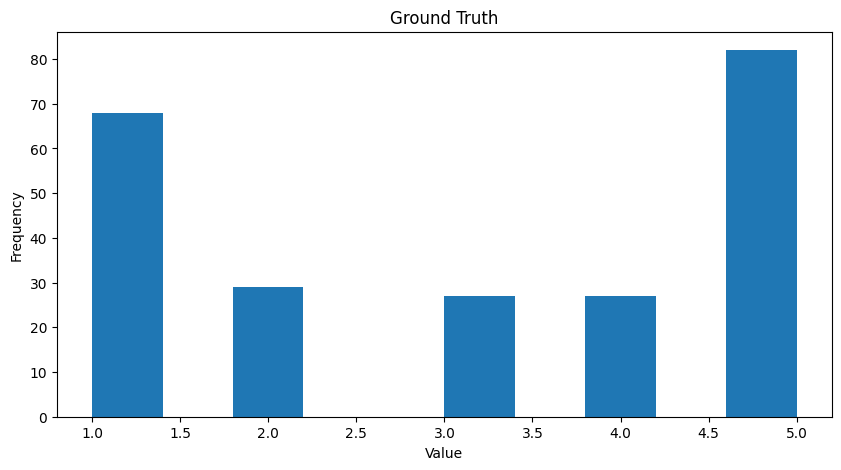

In [109]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf,'ratingScore', 'Ground Truth')

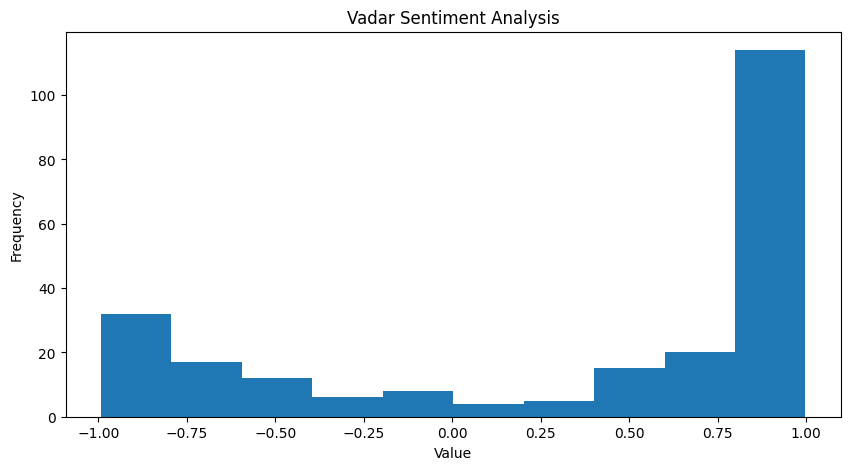

In [110]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

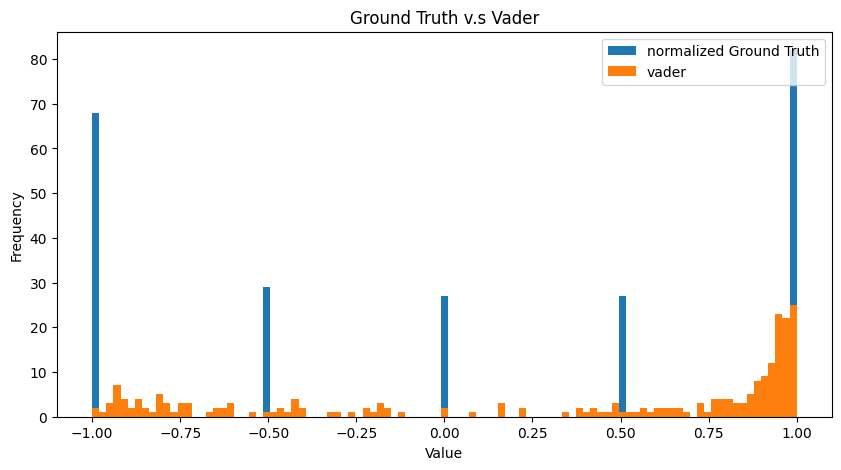

In [111]:
# how do the distrubutions compare between ground truth (normalized) and vader
getHistogram(finaldf, 'both', 'Ground Truth v.s Vader')

Question to think about: do you notice a lot of reviews with a specific sentiment or score? Why do you think that is?

In [112]:
# How do often do the top negative and positive words overlap?
def plot_word_count_with_sentiment(topkpos, topkneg):
  tpdf = pd.DataFrame(topkpos)
  tndf = pd.DataFrame(topkneg)
  tpdf.columns =['word','count']
  tndf.columns =['word','count']
  tpdf['type'] = 'Positive'
  tndf['type'] = 'Negative'
  overlayhist = pd.concat([tpdf,tndf])
  # add title

  fig = plt.figure(figsize=(15,5))
  sns.barplot(x="count", y='word', hue='type', data=overlayhist)

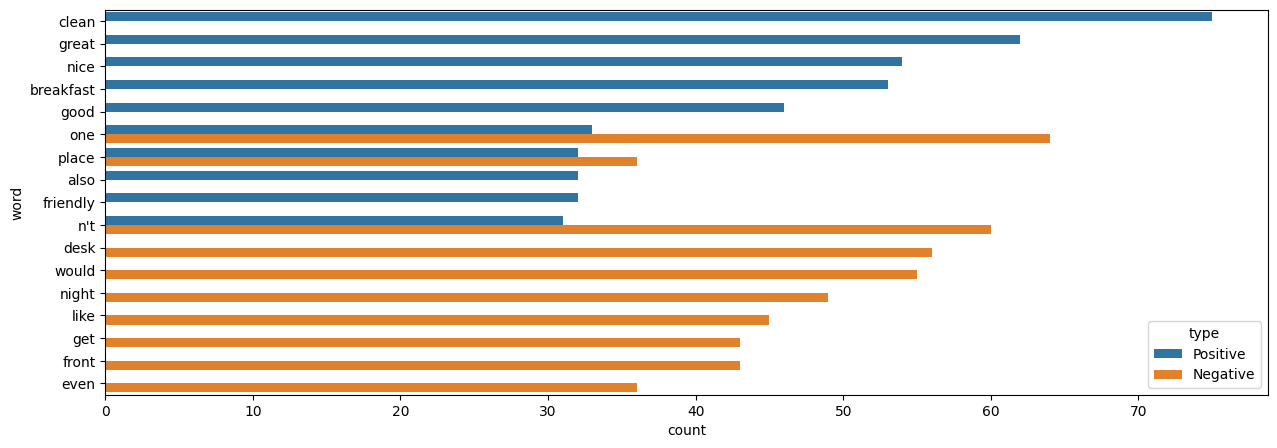

In [113]:
plot_word_count_with_sentiment(topkGroundPos, topkGroundNeg)
# add title and comment explanation

### Boxplots

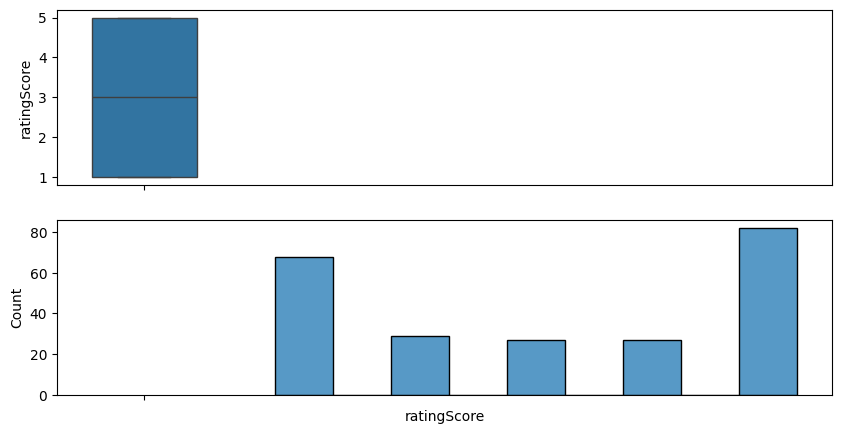

In [114]:
# What does the distribution of scores look like in a boxplot
data = finaldf['ratingScore']

fig, ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
sns.boxplot(data,ax=ax[0])
sns.histplot(data,ax=ax[1]);

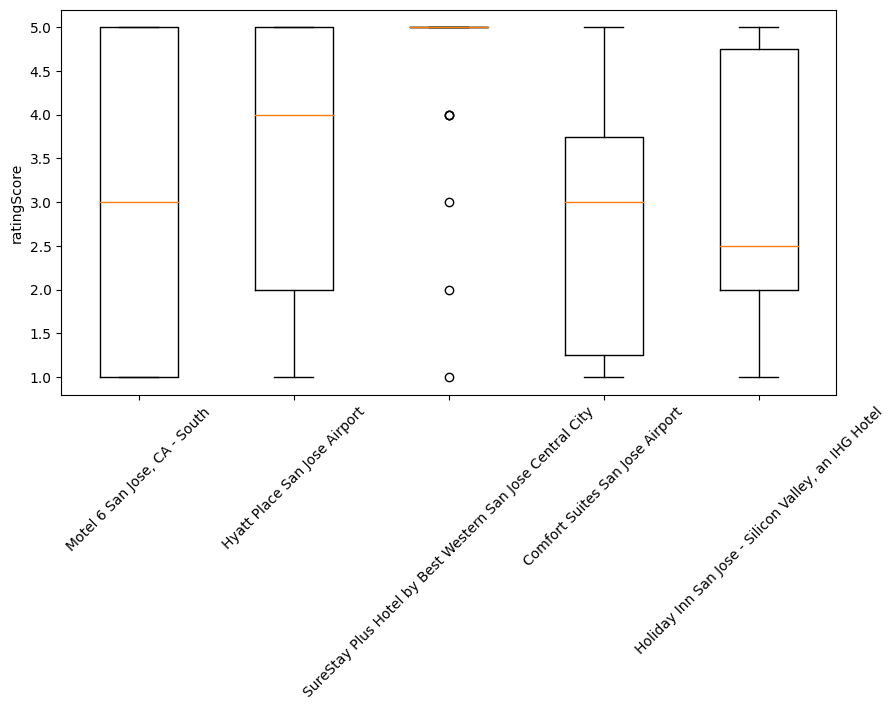

In [115]:
# how do the ratings compare for 5 hotels?
five_hotels = avg_rating_df[avg_rating_df['n_reviews'] > 10].sample(n=5,random_state=14)
five_hotels = five_hotels.index.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45) # make vertical
plt.ylabel('ratingScore')
plt.show()

### Scatter Plots


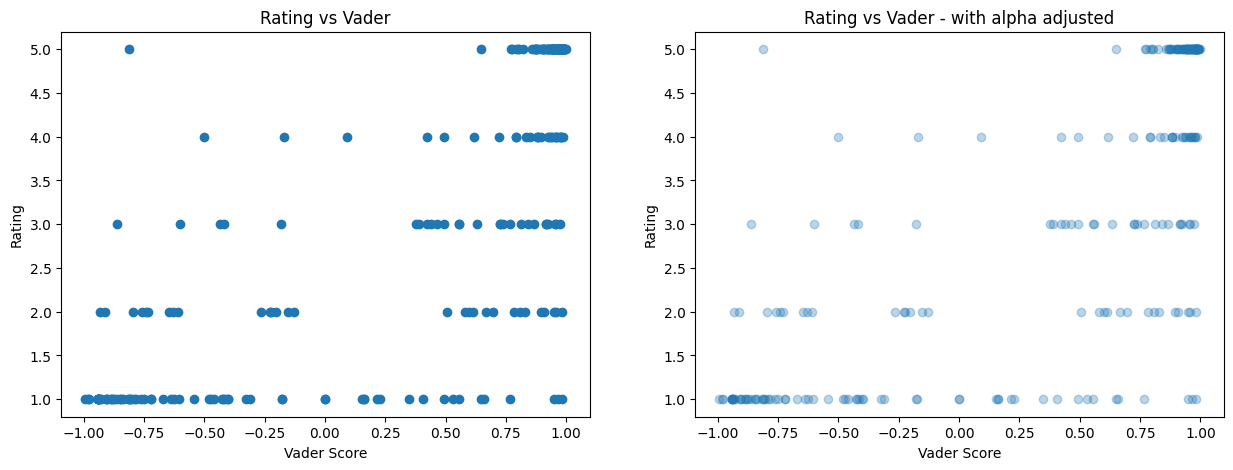

In [116]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

### Heatmaps

In [117]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

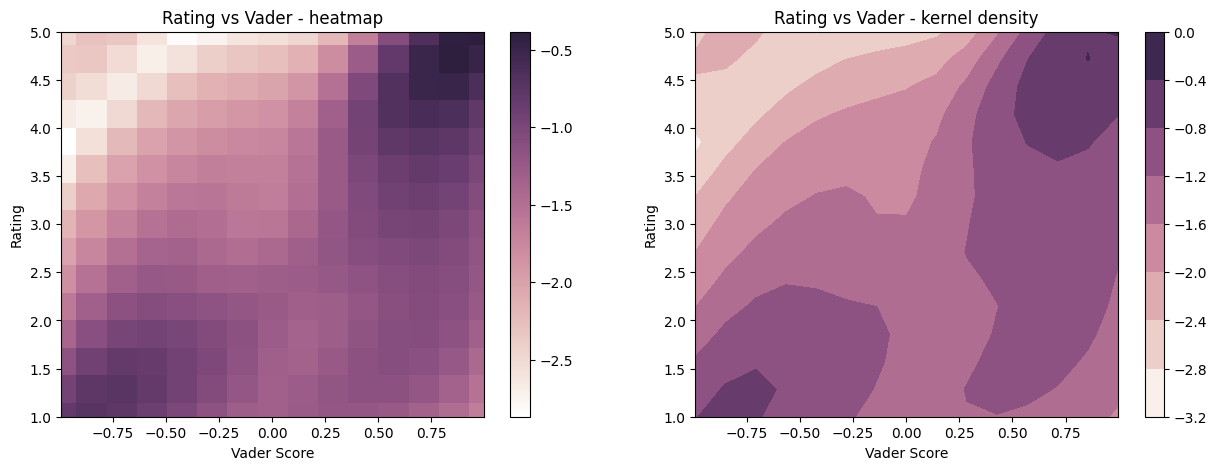

In [118]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

Plot discrete heatmap (1) and contour plot (2).

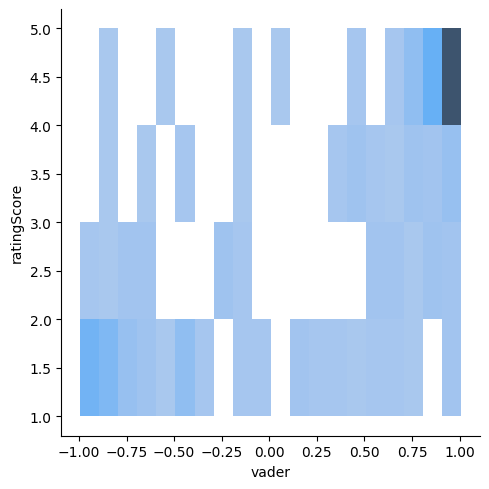

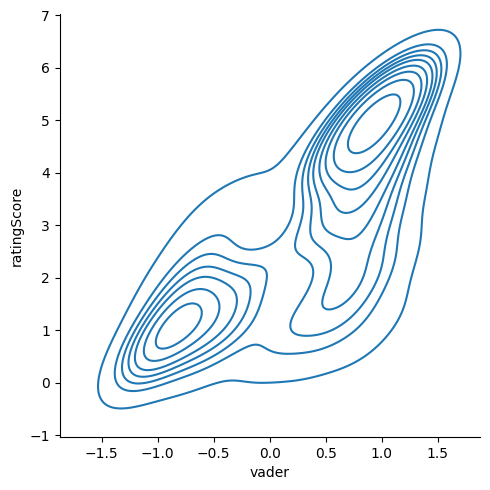

In [119]:
sns.displot(finaldf, y="ratingScore", x="vader", binwidth=(0.1, 1.0)) # discrete heat map
sns.displot(finaldf, y="ratingScore", x="vader", kind="kde" )

### Geolocation


In [120]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

In [121]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
# geo_rating_df = geo_rating_df.replace(["6032 Lundy's Lane, Niagara Falls, Ontario"],'732 Manzanita Dr, Laguna Beach, California')
# geo_rating_df = geo_rating_df.head()

In [122]:
# 0 - need to give the tool a generic name.
locator = Photon(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
AC Hotel by Marriott San Jose Downtown,0.485350,3.375000,8,350 West Santa Clara Street,"('San Jose',)",California,95113,"350 West Santa Clara Street, ('San Jose',), California","(AC Hotel San Jose, 350, West Santa Clara Street, 95113, West Santa Clara Street, San Jose, California, United States, (37.3331821, -121.89622764035269))","(37.3331821, -121.89622764035269, 0.0)",37.333182,-121.896228,0.0
Aloft San Jose Cupertino,0.936600,5.000000,3,4241 Moorpark Ave,"('San Jose',)",California,95129,"4241 Moorpark Ave, ('San Jose',), California","(Aloft San Jose Cupertino, 4241, Moorpark Avenue, 95129, Moorpark Avenue, San Jose, CA, United States, (37.3165277, -121.97717766077747))","(37.3165277, -121.97717766077747, 0.0)",37.316528,-121.977178,0.0
Alura Inn,0.229957,2.714286,7,1378 Oakland Rd,"('San Jose',)",California,95112-1368,"1378 Oakland Rd, ('San Jose',), California","(1378, Oakland Road, 95112, Oakland Road, San Jose, California, United States, (37.371813, -121.8933218))","(37.371813, -121.8933218, 0.0)",37.371813,-121.893322,0.0
Comfort Suites San Jose Airport,0.400206,2.722222,18,1510 N 1st St,"('San Jose',)",California,95112-4822,"1510 N 1st St, ('San Jose',), California","(Comfort Suites San Jose Airport, 1510, North 1st Street, 95112, North 1st Street, San Jose, CA, United States, (37.36369025, -121.9104666120329))","(37.36369025, -121.9104666120329, 0.0)",37.363690,-121.910467,0.0
Extended Stay America - San Jose - Edenvale - North,0.115313,2.695652,23,6199 San Ignacio Ave,"('San Jose',)",California,95119-1389,"6199 San Ignacio Ave, ('San Jose',), California","(Extended Stay America, 6199, San Ignacio Avenue, 95119, San Ignacio Avenue, San Jose, CA, United States, (37.2350423, -121.77517407942315))","(37.2350423, -121.77517407942315, 0.0)",37.235042,-121.775174,0.0


In [123]:
map1 = folium.Map(
    location=[37.335480, -121.893028], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=11,
)

# colour with sentiment
colours = ['#ffe5e5', '#ffc7c7', '#ff8f8f', '#ff6666', '#ff2929']

geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], \
                                                            color=colours[int(round(row["AverageVader"]*2)+2)-1]).add_to(map1), axis=1)

map1

All the hotel locations are shown on the map below. The colour of each marker indicates the average sentiment for the hotel. The darker it is, the more positive the sentiment is.

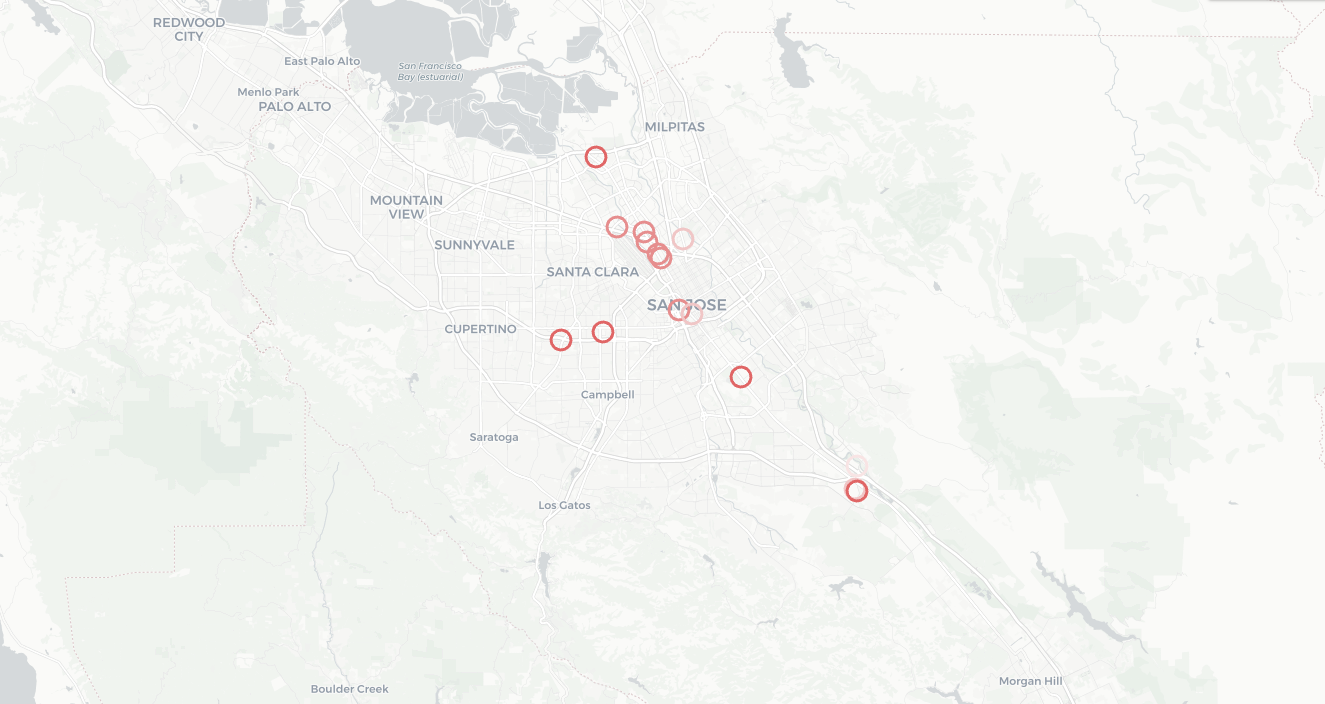

In [124]:
## folium graphs are best saved as screenshot images to be reloaded into the notebook

from IPython.display import Image
Image('demo.png')

## Plotting of time-series data

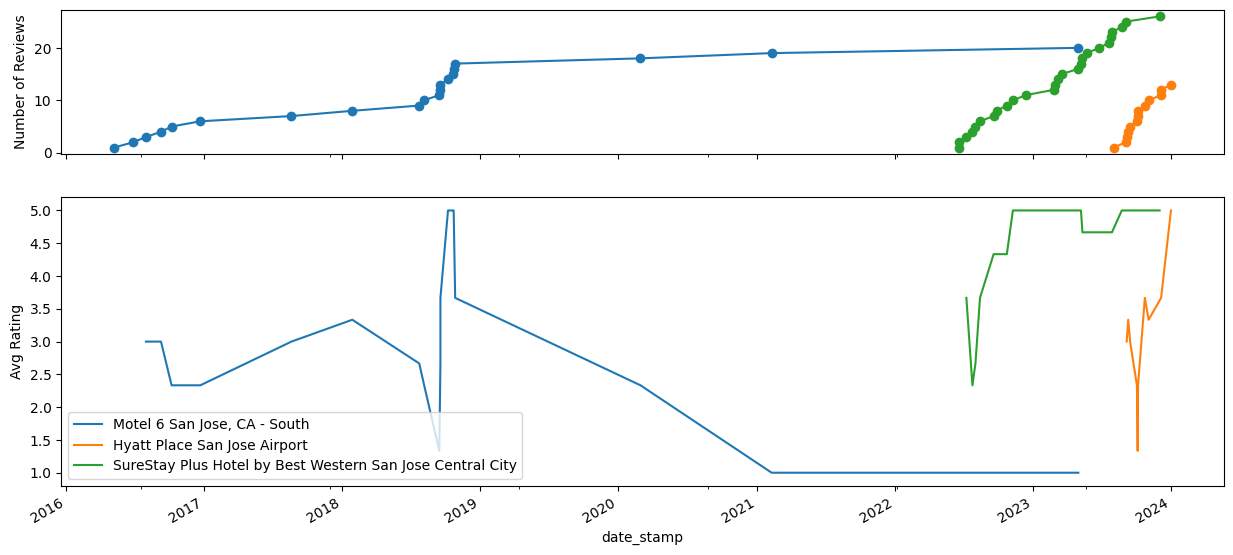

In [125]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in five_hotels[:3]:
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

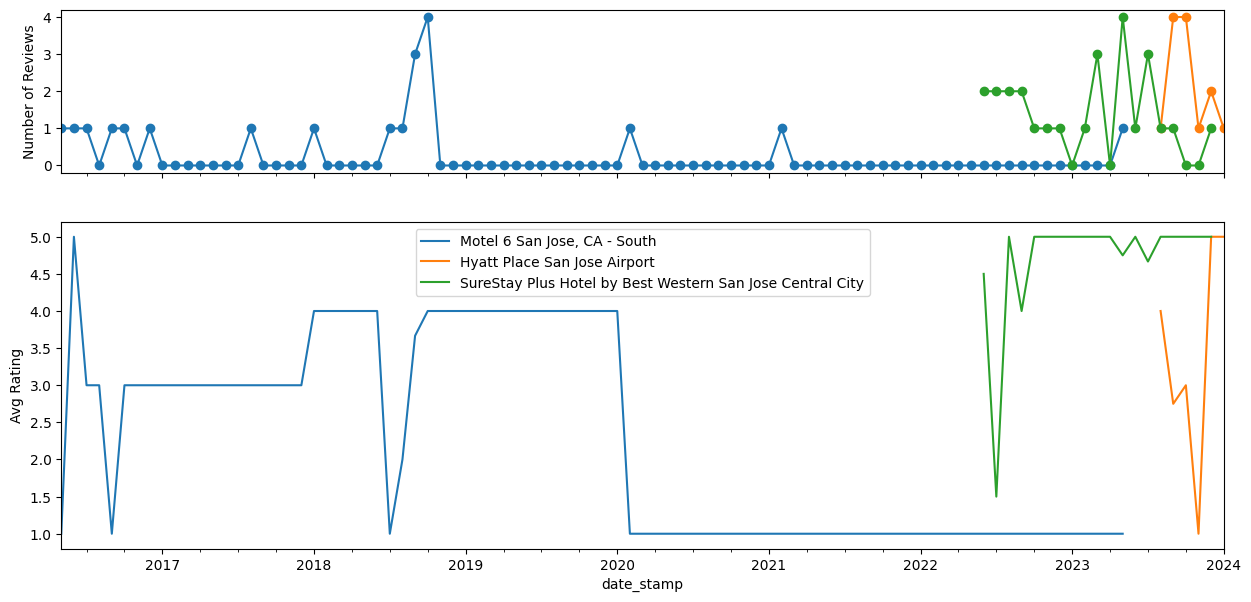

In [126]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in five_hotels[:3]:
  _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

Rating average per year across all hotels over time

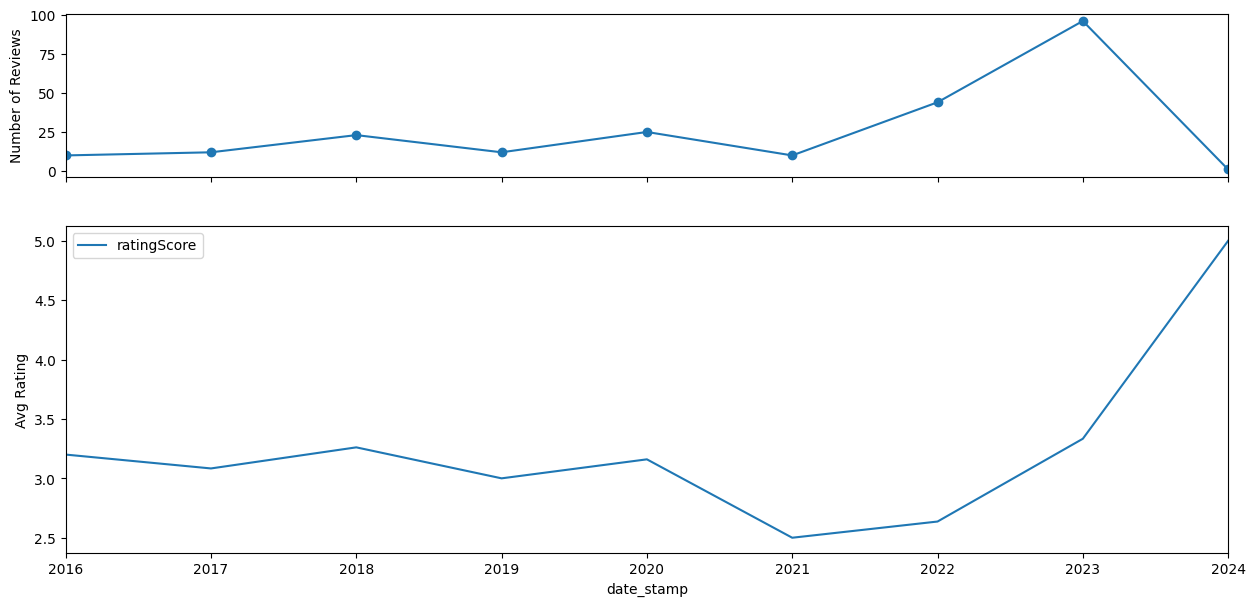

In [127]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

_df = hotelDf.set_index('date_stamp')
_df.index = pd.to_datetime(_df.index)
_df = _df.sort_index()
_df['count'] = 1
_df_yearly = _df.groupby(pd.Grouper(freq='Y')).agg({'count':'sum','ratingScore':'mean'})
_df_yearly['ratingScore'] = _df_yearly['ratingScore'].fillna(method='ffill') # hold the last rating constant in years with no reviews
_df_yearly['count'].plot(ax=ax[0],marker='o')
_df_yearly['ratingScore'].plot(ax=ax[1])

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()